# Analyzing time series with Pandas

## Dataset
We will use a sample dataset for occupancy detection: http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

First we download the dataset into the `./data` directory.

Note: more datasets can be found here: https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

In [7]:
!pip -q install "dask[complete]" 
!wget -q http://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip -O occupancy_data.zip
!unzip -qq -o occupancy_data.zip -d data
!ls -al ./data
!head ./data/datatraining.txt

total 1476
drwxr-xr-x 2 root root   4096 May  2 12:18 .
drwxr-xr-x 1 root root   4096 May  2 10:40 ..
-rw-r--r-- 1 root root 699664 Jan  5  2016 datatest2.txt
-rw-r--r-- 1 root root 200766 Jan  5  2016 datatest.txt
-rw-r--r-- 1 root root 596674 Jan  5  2016 datatraining.txt
"date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"
"1","2015-02-04 17:51:00",23.18,27.272,426,721.25,0.00479298817650529,1
"2","2015-02-04 17:51:59",23.15,27.2675,429.5,714,0.00478344094931065,1
"3","2015-02-04 17:53:00",23.15,27.245,426,713.5,0.00477946352442199,1
"4","2015-02-04 17:54:00",23.15,27.2,426,708.25,0.00477150882608175,1
"5","2015-02-04 17:55:00",23.1,27.2,426,704.5,0.00475699293331518,1
"6","2015-02-04 17:55:59",23.1,27.2,419,701,0.00475699293331518,1
"7","2015-02-04 17:57:00",23.1,27.2,419,701.666666666667,0.00475699293331518,1
"8","2015-02-04 17:57:59",23.1,27.2,419,699,0.00475699293331518,1
"9","2015-02-04 17:58:59",23.1,27.2,419,689.333333333333,0.00475699293331518,1


In [25]:
import pandas as pd
import dask.dataframe as dd

#df = pd.read_csv("./data/datatraining.txt"); df.set_index('date',inplace=True)
ddf = dd.read_csv('./data/*.txt').set_index('date'); df = ddf.compute() # use dask for multiple files
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


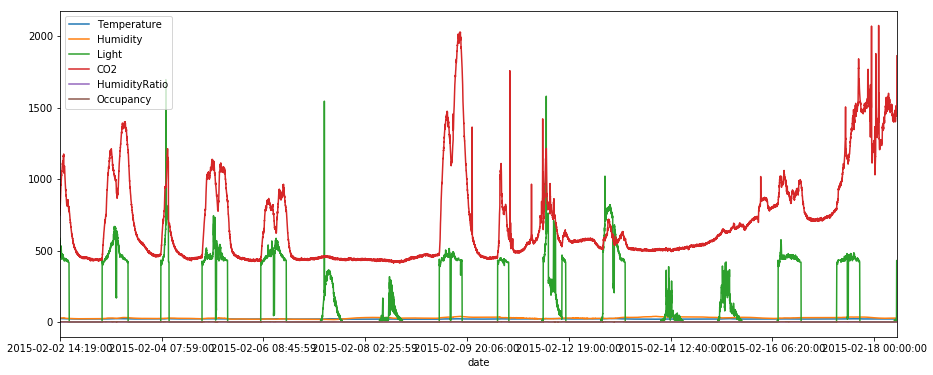

In [23]:
df.plot(figsize=(15, 6))

Because of the different scale of the quantities, we can't inspect them visually. We can use a log plot.

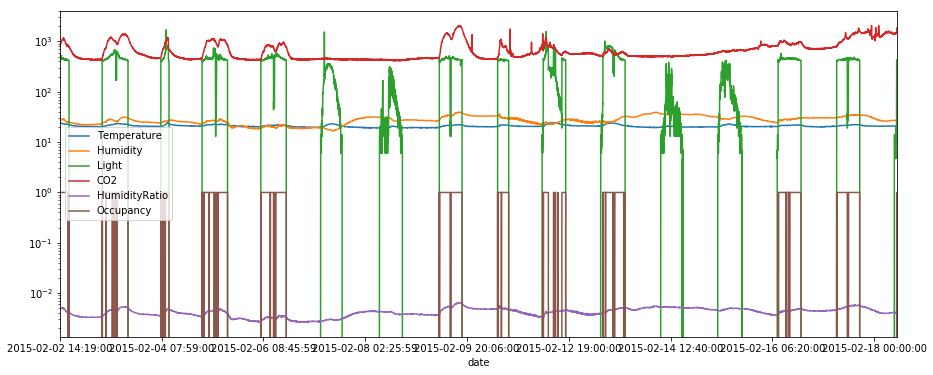

In [14]:
df.plot(figsize=(15, 6),logy=True)

Or we can scale the quantities

(20560, 1)
(20560, 1)
(20560, 1)
(20560, 1)


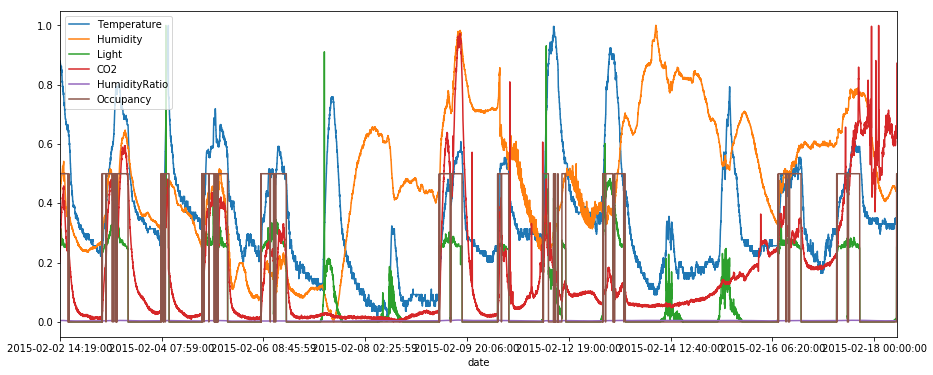

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

columns_to_normalize = ['CO2','Light','Humidity','Temperature']
for c in columns_to_normalize:
  x = df[[c]].values.astype(float)
  print(x.shape)
  scaled = mms.fit_transform(x)
  df[c] = scaled

df['Occupancy'] *= 0.5
df.plot(figsize=(15, 6))

You can plot individual columns as well

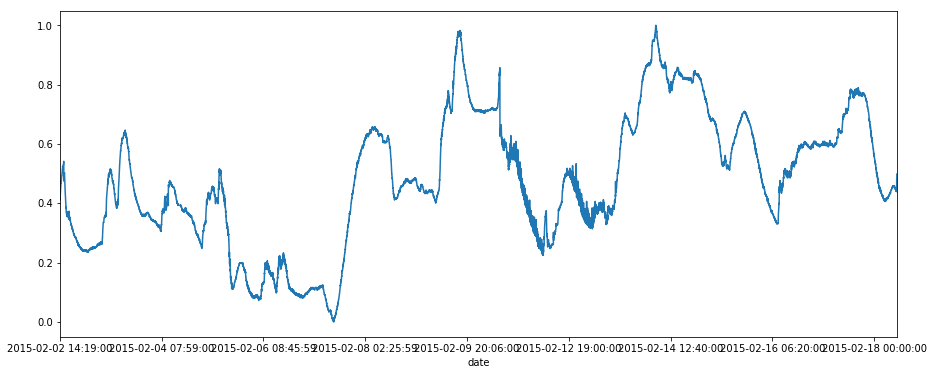

In [20]:
df['Humidity'].plot(figsize=(15, 6))

In [24]:
# Aggregates
df.groupby('Occupancy').mean() # Can be done in dask too for big datasets

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,20.584830,27.529654,25.237893,604.996614,0.004120
1,21.975909,28.076209,481.967380,975.321870,0.004589


In [0]:
ddf.to_parquet('data/2000-01.parquet', engine='pyarrow') # save dask dataframe as parquet

Parquet format is more space efficient than CSV and allows for faster projections and index searches

In [31]:
!ls -al data
!du -h data/2000-01.parquet

total 1480
drwxr-xr-x 3 root root   4096 May  2 13:11 .
drwxr-xr-x 1 root root   4096 May  2 10:40 ..
drwxr-xr-x 2 root root   4096 May  2 13:11 2000-01.parquet
-rw-r--r-- 1 root root 699664 Jan  5  2016 datatest2.txt
-rw-r--r-- 1 root root 200766 Jan  5  2016 datatest.txt
-rw-r--r-- 1 root root 596674 Jan  5  2016 datatraining.txt
396K	data/2000-01.parquet


In [0]:
# http://docs.dask.org/en/latest/use-cases.html